In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#import autoreload  (for debugging external subroutines)
%load_ext autoreload
%autoreload 2

# subroutines needed, we also need kepcart.py
from orbsubs import *  
from outils import *
from scipy.signal import savgol_filter    

plt.rcParams.update({'font.size': 14})


In [2]:
# axis ratios from moments of inertia
#I1>I2>I3
def print_axis_ratios(I1,I2,I3):
    a_p = np.sqrt( (5.0/2.0)*(I1 + I2 - I3) )  #long body associated with I3
    c_p = np.sqrt( (5.0/2.0)*(I2 + I3 - I1) )
    b_p = np.sqrt( (5.0/2.0)*(I3 + I1 - I2) )
    print('a,b,c= {:.3f} {:.3f} {:.3f}'.format(a_p,b_p,c_p))
    print('b/a = {:.3f}, c/a = {:.3f}'.format(b_p/a_p, c_p/a_p))  
    # real axis ratios of primary
    
# precession rate of secondary 
#I1>I2>I3 C=I1, B=I2 A=I1  short axis is biggest moment of inertia  C>B>A
def alpha_s(I1,I2,I3):
    C=I1; B=I2; A=I1
    als = 1.5*(I1 -  0.5*(I2+I3))/I1
    als_big = 1.5*(I1 - I3)/I1  # don't average!
    print('alpha_s/n_B =  {:.3f}, {:.3f},'.format(als,als_big))
    return als,als_big

    
#libration frequency of secondary
def omega_lib(I1,I2,I3):
    oml = np.sqrt(3*(I2-I3)/I1)  # \sqrt{3(B-A)/C}
    print('omega_lib/n_B = {:.3f}'.format(oml))
    return oml
          


### Binary simulation output plotting

In [353]:
# plot some stuff
def mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
        lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,\
           theta_k,theta2_NPA,ntilt2,longtilt2\
           ,froot,dn,tmin,tmax,ofilename):
    # dn is to plot every other point
    nvpanels = 10
    f,axarr =  plt.subplots(nvpanels,1, dpi=200, figsize=(6,10), sharex=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.subplots_adjust(left=0.23, right=0.96, top=0.99, bottom=0.10, \
        wspace=0.22, hspace=0.0)
    
    Porb_init = 2*np.pi/meanmotion[0]
    print('Porb {:.2f}'.format(Porb_init))
    tarrp = tarr/Porb_init
    i0 = 0
    i1 = len(om1)
    if (tmax >0):
        i0 = np.argmin(np.abs(tarrp-tmin))
        i1 = np.argmin(np.abs(tarrp-tmax))
        tarrp -= tmin
        axarr[0].set_xlim([0,tmax-tmin])
        
    
    ###########################
    il = 0;   # top
    axarr[il].set_ylabel('spin')
    smax = np.amax([np.amax(om1[i0:i1]),np.amax(om2[i0:i1])])
    smin = np.amin([np.amin(om1[i0:i1]),np.amin(om2[i0:i1])])
    axarr[il].set_ylim(smin,smax)
    axarr[il].plot(tarrp[i0:i1:dn],om1[i0:i1:dn],'.',color='greenyellow',\
                   ms=2,label=r'$\omega_p$')
    axarr[il].plot(tarrp[i0:i1:dn],om2[i0:i1:dn],'.',color='blue',alpha=0.5,\
                   ms=2,label=r'$\omega_s$')
    mm_smo = meanmotion
    if (len(tarr)>100):
        mm_smo = savgol_filter(meanmotion, 21, 2, mode='nearest')
    axarr[il].plot(tarrp[::dn],mm_smo[::dn]*1,':',color='brown',lw=2,alpha=0.5)
    axarr[il].plot(tarrp[::dn],mm_smo[::dn]*1,':',color='mistyrose',lw=1,alpha=1)
    for j in range(2,7):
        axarr[il].plot(tarrp[i0:i1:dn],mm_smo[i0:i1:dn]*j,':',color='brown',lw=1,alpha=0.5)
    #for j in range(0,7):
    #    axarr[il].plot(tarr[::dn],mm_smo[::dn]*(j+0.5),':',color='purple',lw=1,alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper right')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('obliquity')
    axarr[il].plot(tarrp[i0:i1:dn],lobliquity_deg1[i0:i1:dn],'.',color='red',\
                   ms=1,label=r'$\epsilon_p$')
    #axarr[il].plot(tarr[::dn],sobliquity_deg2[::dn],'.',color='orange',\
    #               ms=1,label='sec')
    axarr[il].plot(tarrp[i0:i1:dn],lobliquity_deg2[i0:i1:dn],'.',color='darkorange',\
                   ms=1,label=r'$\epsilon_s$',alpha=0.6)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('libration\n angle')
    lib_a = lib_angle2%np.pi
    ii = (lib_a > np.pi/2)
    lib_a[ii] -= np.pi
    lib_a *= 180.0/np.pi
    axarr[il].plot(tarrp[i0:i1:dn],lib_a[i0:i1:dn],'.',color='purple',ms=2,alpha=0.6,\
                   label=r'$\phi_{lib,s}$')

    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='lower right')
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('long\n axis inc.')
    axarr[il].plot(tarrp[i0:i1:dn],longtilt2[i0:i1:dn]*180/np.pi,'.',color='gray',ms=2,\
                   label=r'inclination of $\hat {\bf i}_s$',alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper right')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('NPA\n angle')
    axarr[il].plot(tarrp[i0:i1:dn],theta2_NPA[i0:i1:dn]*180/np.pi,'.',color='orchid',ms=2,\
                   label=r'$\theta_{NPA,s}$',alpha=0.6)
    
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('short\n axis tilt')
    axarr[il].plot(tarrp[i0:i1:dn],ntilt2[i0:i1:dn]*180/np.pi,'.',color='deepskyblue',\
                   ms=1,label=r'acos $|\hat {\bf k}_s \cdot \hat {\bf l}_B|$',alpha=0.6)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel(r'precession')
    res_ang = (lprec_ang2 - theta_B)%np.pi
    axarr[il].plot(tarrp[::dn],res_ang[::dn]*180.0/np.pi,'.',color='peru',ms=2,\
                   label=r'$\theta_{ls} - \theta_B$',alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('res.\n ang')
    #res_ang = (2*phi2 - 2*theta_B + theta_k)%np.pi
    res_ang2 = (2*lib_angle2 + theta_k)%np.pi
    #axarr[il].plot(tarrp[i0:i1:dn],res_ang[i0:i1:dn]*180/np.pi,'.',color='green',ms=2,\
    #               label=r'$2(\phi_2- \theta_B) + \theta_{kB}$',alpha=0.5)
    axarr[il].plot(tarrp[i0:i1:dn],res_ang2[i0:i1:dn]*180/np.pi,'.',color='orangered',ms=2,\
                   label=r'$2 \phi_{lib,s} + \theta_{kB}$',alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel(r'$a_B/R_p$')
    amax = max(aaarr[i0:i1])
    amin = min(aaarr[i0:i1])
    if (amax > 5):
        axarr[il].set_ylim(max(amin,0),5)
    axarr[il].plot(tarrp[i0:i1:dn],aaarr[i0:i1:dn],'.',color='green',ms=2,alpha=0.6)
    
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    ########################## 
    il += 1;
    axarr[il].set_ylabel(r'$e_B, i_B$')
    emax = max(eearr)
    #emin = 0
    if (emax > 1):
        axarr[il].set_ylim(0,1)
    
    axarr[il].plot(tarrp[i0:i1:dn],eearr[i0:i1:dn],'.',color='dodgerblue',ms=2,label=r'$e_B$',alpha=0.6)
    axarr[il].plot(tarrp[i0:i1:dn],iiarr[i0:i1:dn],'.',color='red',ms=1,label=r'$i_B$',alpha=0.3)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    
    ########################## 
    
    il = nvpanels-1;
    axarr[il].set_xlabel('time (orbital periods)')
    if (len(ofilename)>3):
        plt.savefig(ofilename)

In [354]:
# global information needed!
simdir = "../bin3/" # where simulation output files are found  
m1 = 1.0;  # masses of the two bodies!  Globals!
m2 = 0.01;  #  lower mass secondary
GM = m1+m2 # G=1

In [355]:
froot = 'b1'  # seed=4
ofilename='b1.png'
tmax=-1;tmin=0; print (4e5/32.49)

12311.480455524776


../bin3/b1_ext_1.txt
../bin3/b1_ext_2.txt
Porb 32.49


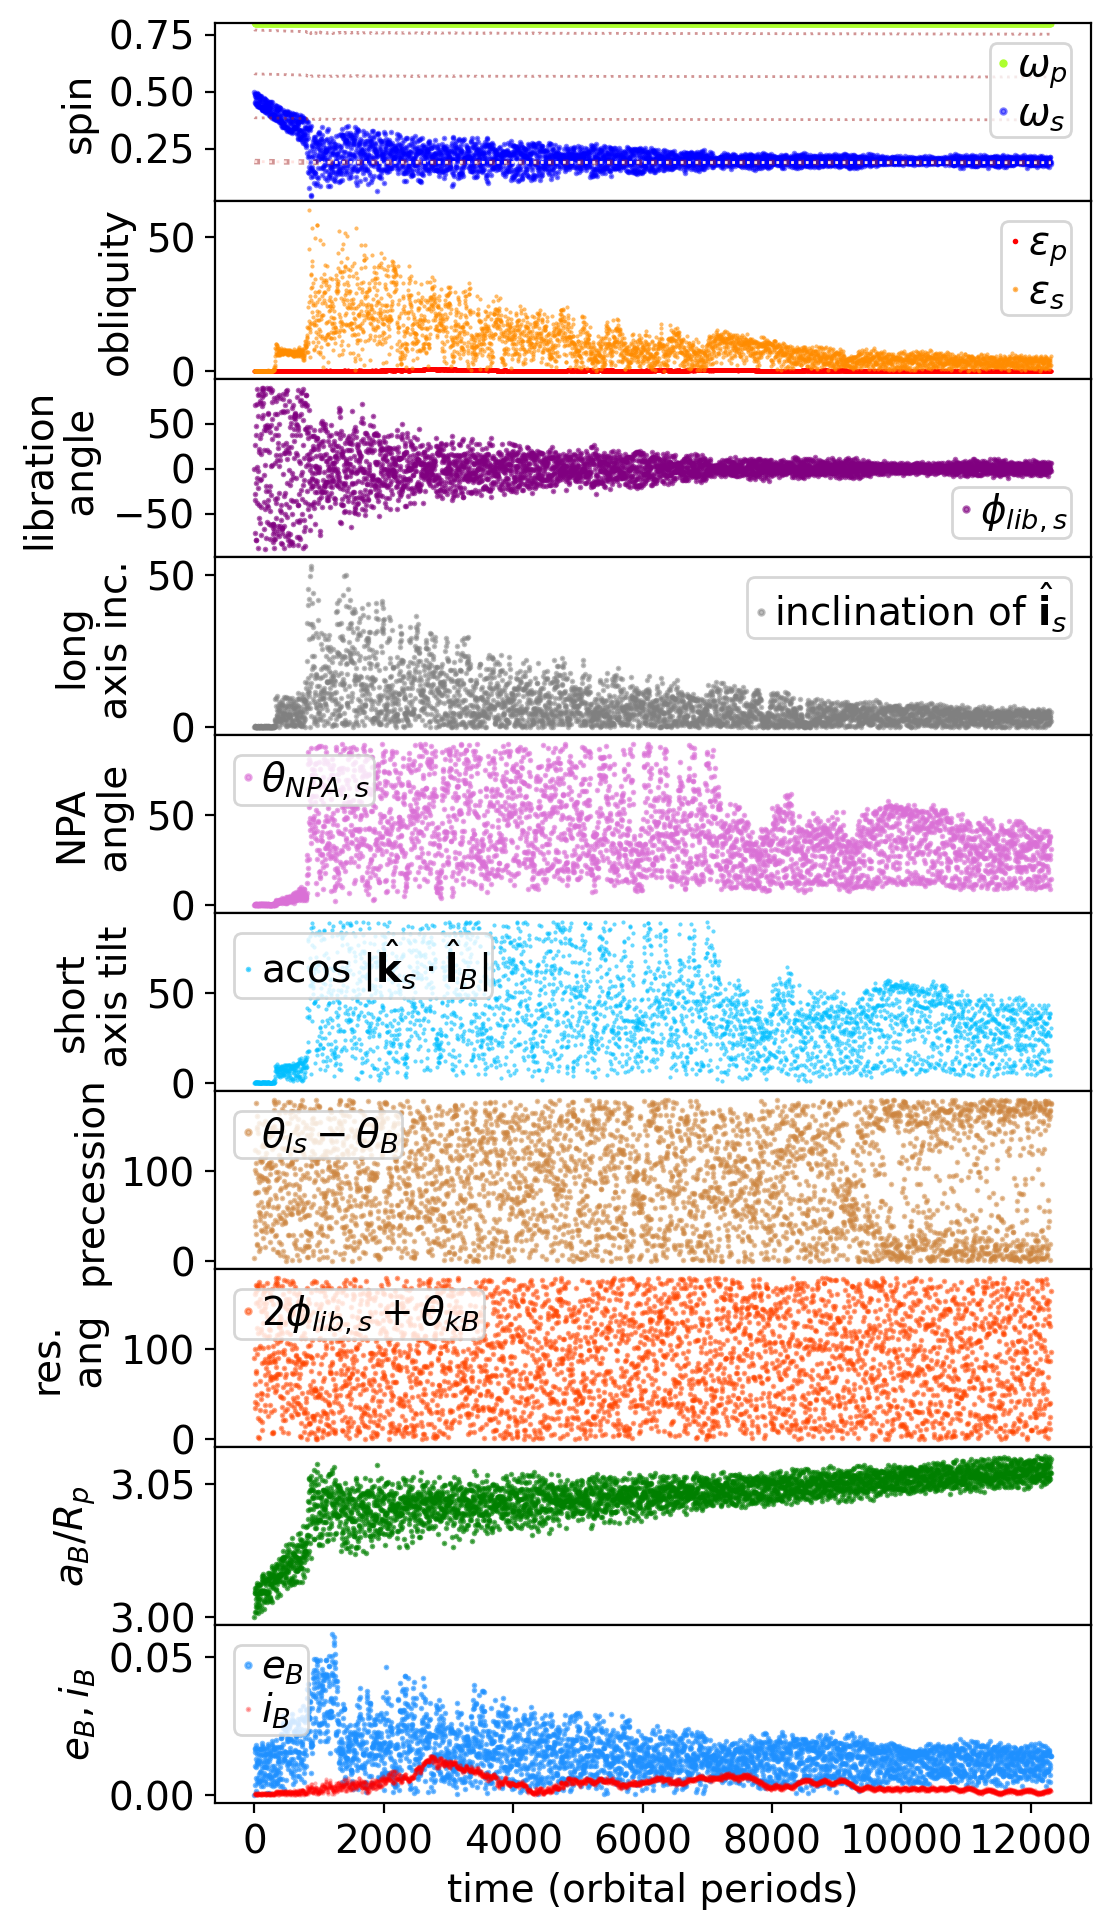

In [356]:
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
        lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,theta_k,theta2_NPA,ntilt2,longtilt2\
        = read_two_bodies(simdir,froot,GM)
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
       lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,\
       theta_k,theta2_NPA,ntilt2,longtilt2\
       ,froot,10,tmin,tmax,ofilename)

In [385]:
# b1 simulation
I1_p, I2_p, I3_p =   0.485491, 0.449510, 0.428806
I1_s, I2_s, I3_s =  0.000290, 0.000270, 0.000197
print('primary:')
print_axis_ratios(I1_p,I2_p,I3_p)
print('secondary:')
print_axis_ratios(I1_s,I2_s,I3_s)
als,als_big = alpha_s(I1_s,I2_s,I3_s)
oml = omega_lib(I1_s,I2_s,I3_s)

primary:
a,b,c= 1.125 1.078 0.991
b/a = 0.958, c/a = 0.881
secondary:
a,b,c= 0.030 0.023 0.021
b/a = 0.773, c/a = 0.698
alpha_s/n_B =  0.292, 0.481,
omega_lib/n_B = 0.869


In [342]:
# plot some stuff
def mkplot2(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
        lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,\
           theta_k,theta2_NPA,ntilt2,longtilt2\
           ,froot,dn,tmin,tmax,ofilename):
    # dn is to plot every other point
    nvpanels = 10
    f,axarr =  plt.subplots(nvpanels,1, dpi=200, figsize=(6,10), sharex=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.subplots_adjust(left=0.23, right=0.96, top=0.99, bottom=0.10, \
        wspace=0.22, hspace=0.0)
    
    Porb_init = 2*np.pi/meanmotion[0]
    tarrp = tarr/Porb_init
    i0 = 0
    i1 = len(om1)
    if (tmax >0):
        i0 = np.argmin(np.abs(tarrp-tmin))
        i1 = np.argmin(np.abs(tarrp-tmax))
        #tarrp -= tmin;  axarr[0].set_xlim([0,tmax-tmin])
        axarr[0].set_xlim([tmin,tmax])
        
    
    ###########################
    il = 0;   # top
    axarr[il].set_ylabel('spin')
    smax = np.amax([np.amax(om1[i0:i1]),np.amax(om2[i0:i1])])
    smin = np.amin([np.amin(om1[i0:i1]),np.amin(om2[i0:i1])])
    axarr[il].set_ylim(smin,smax)
    axarr[il].plot(tarrp[i0:i1:dn],om1[i0:i1:dn],'.',color='greenyellow',\
                   ms=2,label=r'$\omega_p$')
    axarr[il].plot(tarrp[i0:i1:dn],om2[i0:i1:dn],'.',color='blue',alpha=0.5,\
                   ms=2,label=r'$\omega_s$')
    mm_smo = meanmotion
    if (len(tarr)>100):
        mm_smo = savgol_filter(meanmotion, 21, 2, mode='nearest')
    axarr[il].plot(tarrp[::dn],mm_smo[::dn]*1,':',color='brown',lw=2,alpha=0.5)
    axarr[il].plot(tarrp[::dn],mm_smo[::dn]*1,':',color='mistyrose',lw=1,alpha=1)
    for j in range(2,7):
        axarr[il].plot(tarrp[i0:i1:dn],mm_smo[i0:i1:dn]*j,':',color='brown',lw=1,alpha=0.5)
    #for j in range(0,7):
    #    axarr[il].plot(tarr[::dn],mm_smo[::dn]*(j+0.5),':',color='purple',lw=1,alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('obliquity')
    axarr[il].plot(tarrp[i0:i1:dn],lobliquity_deg1[i0:i1:dn],'.',color='red',\
                   ms=1,label=r'$\epsilon_p$')
    #axarr[il].plot(tarr[::dn],sobliquity_deg2[::dn],'.',color='orange',\
    #               ms=1,label='sec')
    axarr[il].plot(tarrp[i0:i1:dn],lobliquity_deg2[i0:i1:dn],'.',color='darkorange',\
                   ms=1,label=r'$\epsilon_s$',alpha=0.6)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('libration\n angle')
    lib_a = lib_angle2%np.pi
    ii = (lib_a > np.pi/2)
    lib_a[ii] -= np.pi
    lib_a *= 180.0/np.pi
    axarr[il].plot(tarrp[i0:i1:dn],lib_a[i0:i1:dn],'.',color='purple',ms=2,alpha=0.6,\
                   label=r'$\phi_{lib,s}$')

    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='lower left')
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('long\n axis inc.')
    axarr[il].plot(tarrp[i0:i1:dn],longtilt2[i0:i1:dn]*180/np.pi,'.',color='gray',ms=2,\
                   label=r'inclination $\hat {\bf i}_s$',alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('NPA\n angle')
    axarr[il].plot(tarrp[i0:i1:dn],theta2_NPA[i0:i1:dn]*180/np.pi,'.',color='orchid',ms=2,\
                   label=r'$\theta_{NPA,s}$',alpha=0.6)
    
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper right')
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('short\n axis tilt')
    axarr[il].plot(tarrp[i0:i1:dn],ntilt2[i0:i1:dn]*180/np.pi,'.',color='deepskyblue',\
                   ms=1,label=r'acos $\hat {\bf k}_s \cdot \hat {\bf l}_B$',alpha=0.6)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper right')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel(r'precession')
    res_ang = (lprec_ang2 - theta_B)%np.pi
    axarr[il].plot(tarrp[::dn],res_ang[::dn]*180.0/np.pi,'.',color='peru',ms=2,\
                   label=r'$\theta_{ls} - \theta_B$',alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('res.\n ang')
    #res_ang = (2*phi2 - 2*theta_B + theta_k)%np.pi
    res_ang2 = (2*lib_angle2 + theta_k)%np.pi
    #axarr[il].plot(tarrp[i0:i1:dn],res_ang[i0:i1:dn]*180/np.pi,'.',color='green',ms=2,\
    #               label=r'$2(\phi_2- \theta_B) + \theta_{kB}$',alpha=0.5)
    axarr[il].plot(tarrp[i0:i1:dn],res_ang2[i0:i1:dn]*180/np.pi,'.',color='orangered',ms=2,\
                   label=r'$2 \phi_{lib,s} + \theta_{kB}$',alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel(r'$a_B/R_p$')
    amax = max(aaarr[i0:i1])
    amin = min(aaarr[i0:i1])
    if (amax > 5):
        axarr[il].set_ylim(max(amin,0),5)
    axarr[il].plot(tarrp[i0:i1:dn],aaarr[i0:i1:dn],'.',color='green',ms=2,alpha=0.6)
    
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    ########################## 
    il += 1;
    axarr[il].set_ylabel(r'$e_B, i_B$')
    emax = max(eearr)
    #emin = 0
    if (emax > 1):
        axarr[il].set_ylim(0,1)
    
    axarr[il].plot(tarrp[i0:i1:dn],eearr[i0:i1:dn],'.',color='dodgerblue',ms=2,label=r'$e_B$',alpha=0.6)
    axarr[il].plot(tarrp[i0:i1:dn],iiarr[i0:i1:dn],'.',color='red',ms=1,label=r'$i_B$',alpha=0.3)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    
    ########################## 
    
    il = nvpanels-1;
    axarr[il].set_xlabel('time (orbital periods)')
    if (len(ofilename)>3):
        plt.savefig(ofilename)

../bin3/b1c_ext_1.txt
../bin3/b1c_ext_2.txt


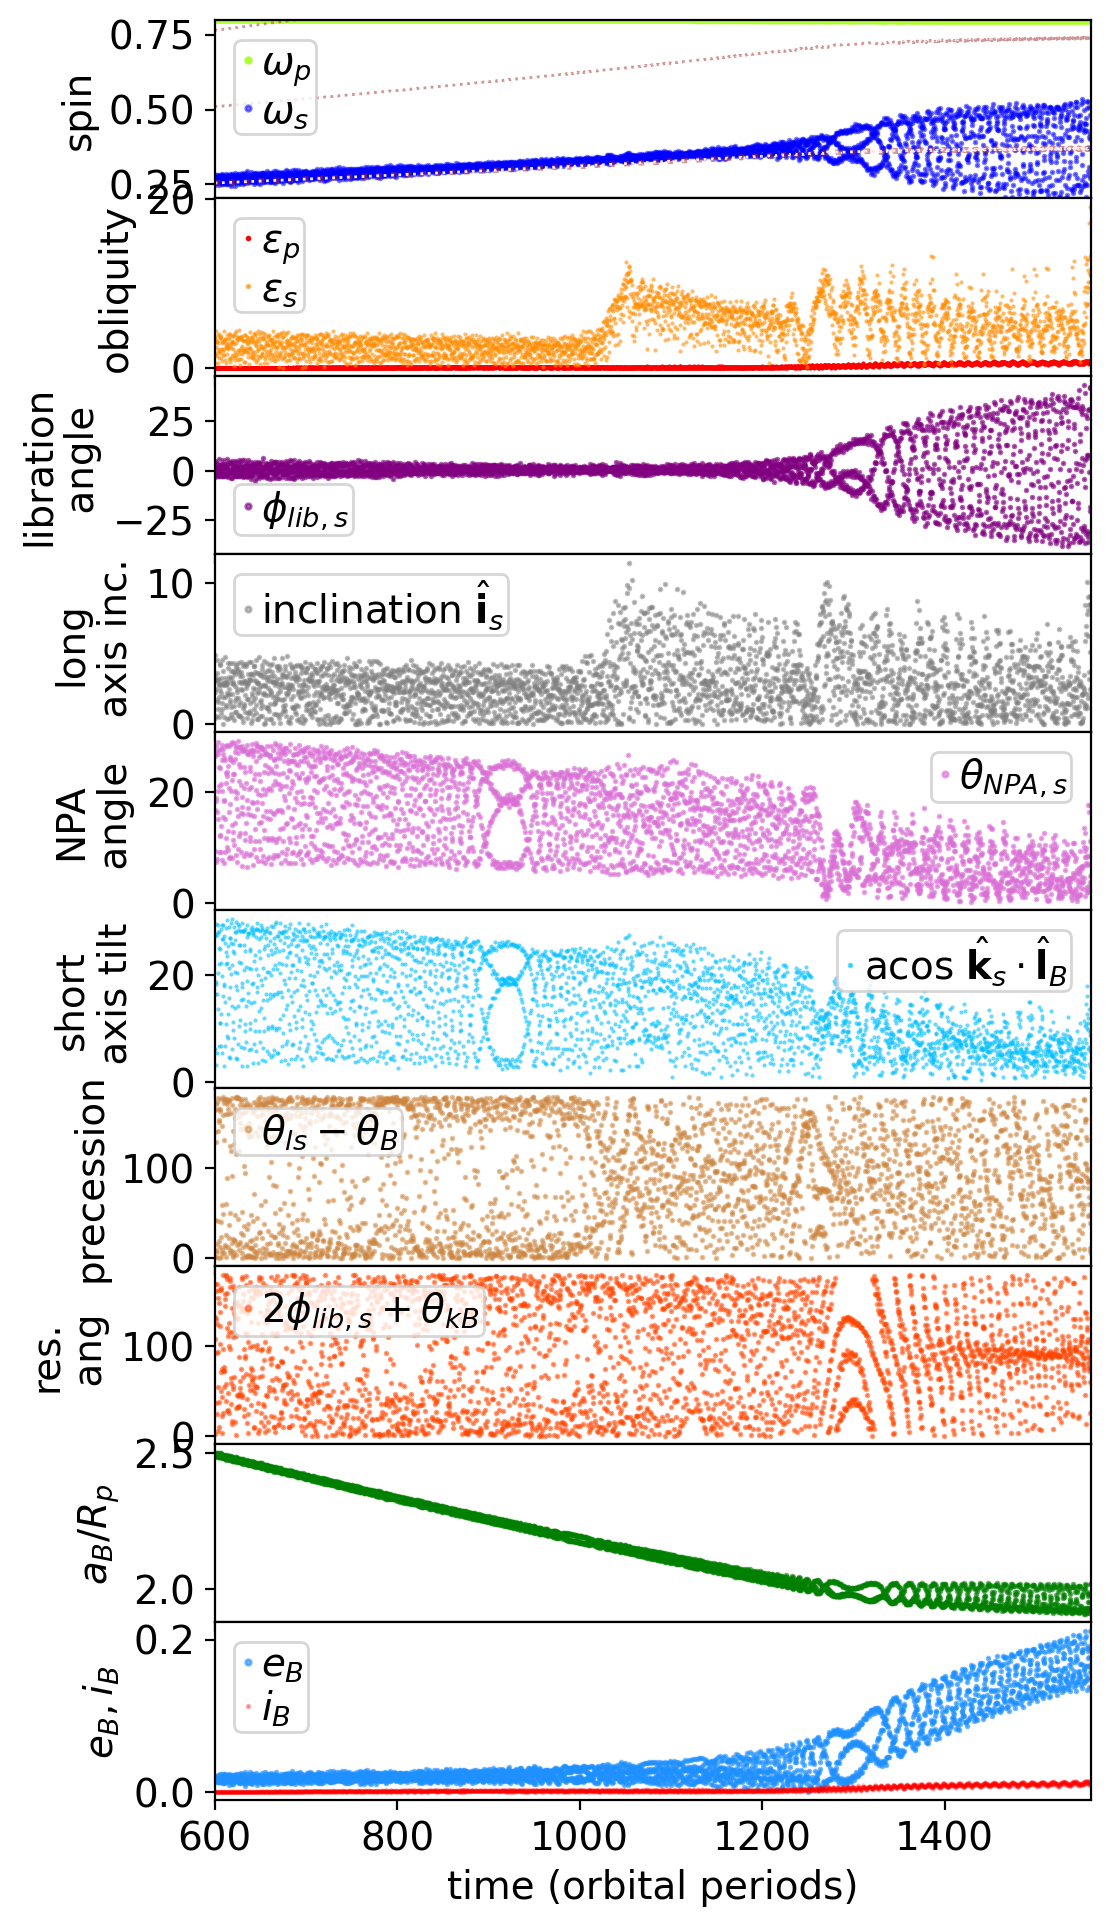

In [343]:
froot = 'b1c'  # no tides, drift inward semi-major axis
ofilename='b1c.png'
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
        lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,theta_k,theta2_NPA,ntilt2,longtilt2\
        = read_two_bodies(simdir,froot,GM)
mkplot2(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
       lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,\
       theta_k,theta2_NPA,ntilt2,longtilt2\
       ,froot,1,600,1560,ofilename)

In [323]:
# plot some stuff to explore
def mkplot_explore(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
        lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,\
           theta_k,theta2_NPA,ntilt2,longtilt2\
           ,froot,dn,tmin,tmax,ofilename):
    # dn is to plot every other point
    nvpanels = 9
    f,axarr =  plt.subplots(nvpanels,1, dpi=200, figsize=(6,10), sharex=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.subplots_adjust(left=0.23, right=0.96, top=0.99, bottom=0.10, \
        wspace=0.22, hspace=0.0)
    
    Porb_init = 2*np.pi/meanmotion[0]
    tarrp = tarr/Porb_init
    i0 = 0
    i1 = len(om1)
    if (tmax >0):
        i0 = np.argmin(np.abs(tarrp-tmin))
        i1 = np.argmin(np.abs(tarrp-tmax))
        tarrp -= tmin
        axarr[0].set_xlim([0,tmax-tmin])
        
    
    ###########################
    il = 0;   # top
    
    axarr[il].set_ylabel('obliquity')
    axarr[il].plot(tarrp[i0:i1:dn],lobliquity_deg1[i0:i1:dn],'.',color='red',\
                   ms=1,label=r'$\epsilon_p$')
    #axarr[il].plot(tarr[::dn],sobliquity_deg2[::dn],'.',color='orange',\
    #               ms=1,label='sec')
    axarr[il].plot(tarrp[i0:i1:dn],lobliquity_deg2[i0:i1:dn],'.',color='darkorange',\
                   ms=1,label=r'$\epsilon_s$',alpha=0.6)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel(r'precession')
    res_ang = (lprec_ang2 - theta_B)%np.pi
    #res_ang3 = (nprec_ang2 - theta_B)%np.pi

    
    axarr[il].plot(tarrp[::dn],res_ang[::dn]*180.0/np.pi,'.',color='peru',ms=2,\
                   label=r'$\Omega_{ls} - \theta_B$',alpha=0.5)
    #axarr[il].plot(tarrp[::dn],res_ang3[::dn]*180.0/np.pi,'.',color='gold',ms=2,\
    #               label=r'$\Omega_{ks} - \theta_B$',alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    ##########################
    
    il += 1;
    axarr[il].set_ylabel('res angle')
    res_ang3 = (nprec_ang2 - theta_B)%np.pi
    axarr[il].plot(tarrp[::dn],res_ang3[::dn]*180/np.pi,'.',color='peru',ms=2,\
                   label=r'$\Omega_{ns} - \lambda_B$',alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='lower right')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('res angle')
    res_ang = (phi2 - theta_B)%np.pi
    axarr[il].plot(tarrp[i0:i1:dn],res_ang[i0:i1:dn]*180/np.pi,'.',color='purple',ms=2,alpha=0.6,\
                   label=r'$\phi_2 - \lambda_B$')

    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='lower right')
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('res ang')
    res_ang = (2*phi2 - 2*theta_B + theta_k)%np.pi
    res_ang2 = (2*lib_angle2 + theta_k)%np.pi
    axarr[il].plot(tarrp[i0:i1:dn],res_ang[i0:i1:dn]*180/np.pi,'.',color='green',ms=2,\
                   label=r'$2(\phi_2- \theta_B) + \theta_{kB}$',alpha=0.5)
    axarr[il].plot(tarrp[i0:i1:dn],res_ang2[i0:i1:dn]*180/np.pi,'.',color='gray',ms=2,\
                   label=r'$2 \phi_{lib,s} + \theta_{kB}$',alpha=0.5)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper right')
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('res angle')
    res_ang = (phi2 - theta_B + theta_k)%np.pi
    axarr[il].plot(tarrp[i0:i1:dn],res_ang[i0:i1:dn]*180/np.pi,'.',color='orchid',ms=2,\
                   label=r'$\phi_2 - \theta_B + \theta_k$',alpha=0.6)
    
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel('res angle')
    varpi = lnarr+ararr
    res_ang = (phi2 - varpi)%np.pi
    res_ang2 = (phi2 - ararr)%np.pi
    res_ang3 = (phi2 - lnarr)%np.pi
    axarr[il].plot(tarrp[i0:i1:dn],res_ang[i0:i1:dn]*180/np.pi,'.',color='deepskyblue',\
                   ms=1,label=r'$\phi_2 -\varpi$',alpha=0.6)
    axarr[il].plot(tarrp[i0:i1:dn],res_ang2[i0:i1:dn]*180/np.pi,'.',color='red',\
                   ms=1,label=r'$\phi_2 -\omega_B$',alpha=0.6)
    axarr[il].plot(tarrp[i0:i1:dn],res_ang3[i0:i1:dn]*180/np.pi,'.',color='peru',\
                   ms=1,label=r'$\phi_2 -\Omega_B$',alpha=0.6)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    
    
    
    ##########################
    il += 1;
    axarr[il].set_ylabel(r'res ang')
    res_ang = (nprec_ang2 - theta_k)%np.pi
    axarr[il].plot(tarrp[i0:i1:dn],res_ang[i0:i1:dn]*180.0/np.pi,'.',color='green',ms=2,alpha=0.6,\
                   label=r'$\Omega_{ks} - \theta_k$')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    

    
    ########################## 
    il += 1;
    axarr[il].set_ylabel(r'res ang')

    res_ang = (phi2 + nprec_ang2 - theta_B)%np.pi

    axarr[il].plot(tarrp[i0:i1:dn],res_ang[i0:i1:dn]*180.0/np.pi,'.',color='red',ms=1,alpha=0.3,\
                  label=r'$\phi_2 + \Omega_{ks} - \theta_B$')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='upper left')
    
    
    ########################## 
    
    il = nvpanels-1;
    axarr[il].set_xlabel('time (orbital periods)')
    if (len(ofilename)>3):
        plt.savefig(ofilename)

In [340]:
froot = 'b1c'  # no tides, drift inward semi-major axis
ofilename='b1c_exp.png'

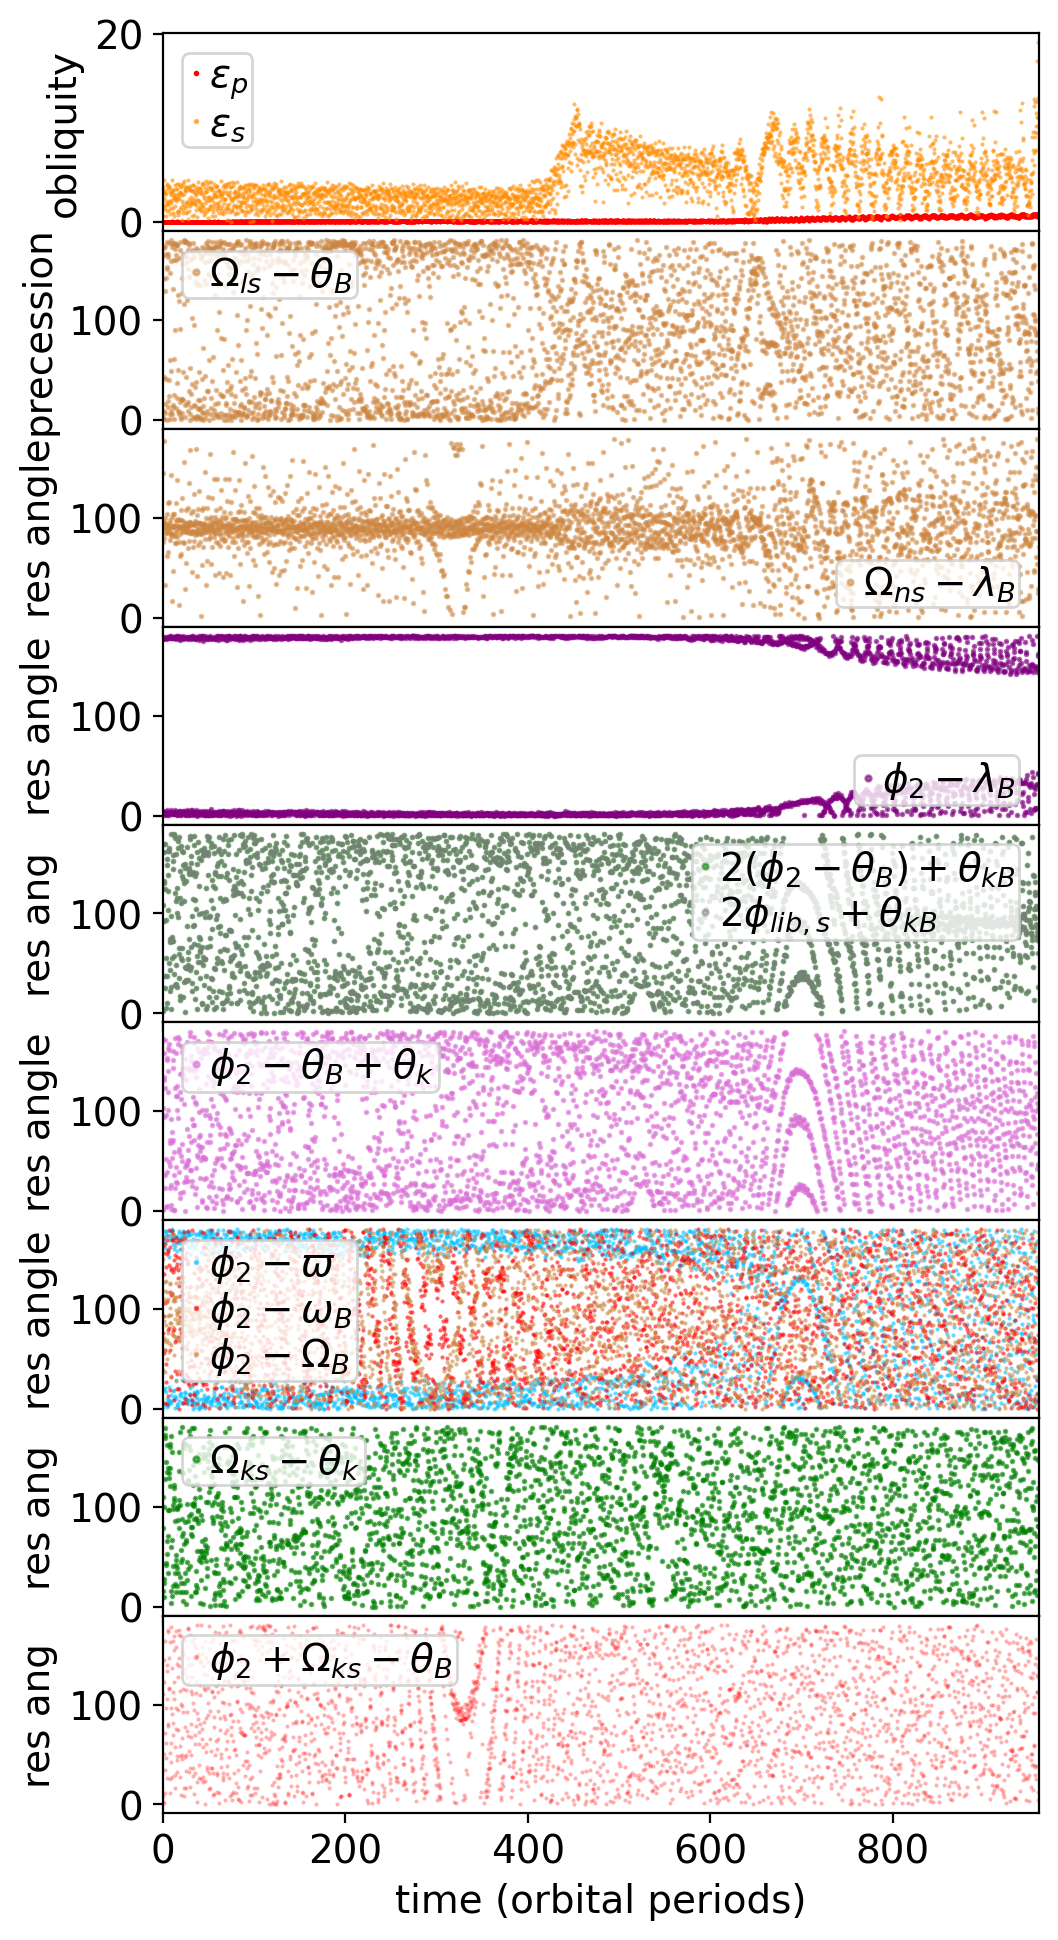

In [341]:
mkplot_explore(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
       lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,\
       theta_k,theta2_NPA,ntilt2,longtilt2\
       ,froot,1,600,1560,ofilename)

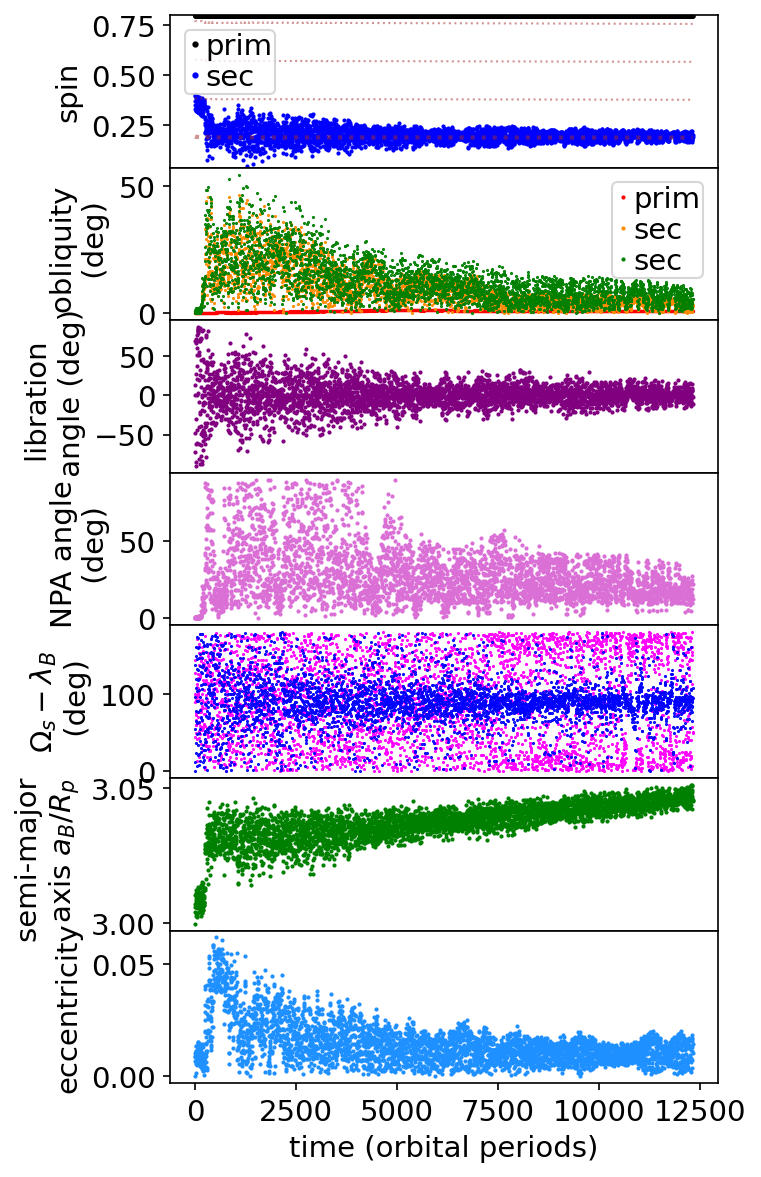

In [5]:

# old!

# read in orbital elements, spins for both resolved bodies
froot = 'a1'  # tides alone trying to let secondary tidally lock
ofilename='a1.png'
tmin=0;tmax=-1

tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
        lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,theta_k,theta2_NPA,ntilt2,longtilt2\
        = read_two_bodies(simdir,froot,GM)
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
       lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,\
       theta_k,theta2_NPA,ntilt2,longtilt2\
       ,froot,10,tmin,tmax,ofilename)




In [151]:
froot = 'b1b'  # spin down of primary
ofilename=''

../bin3/b1b_ext_1.txt
../bin3/b1b_ext_2.txt


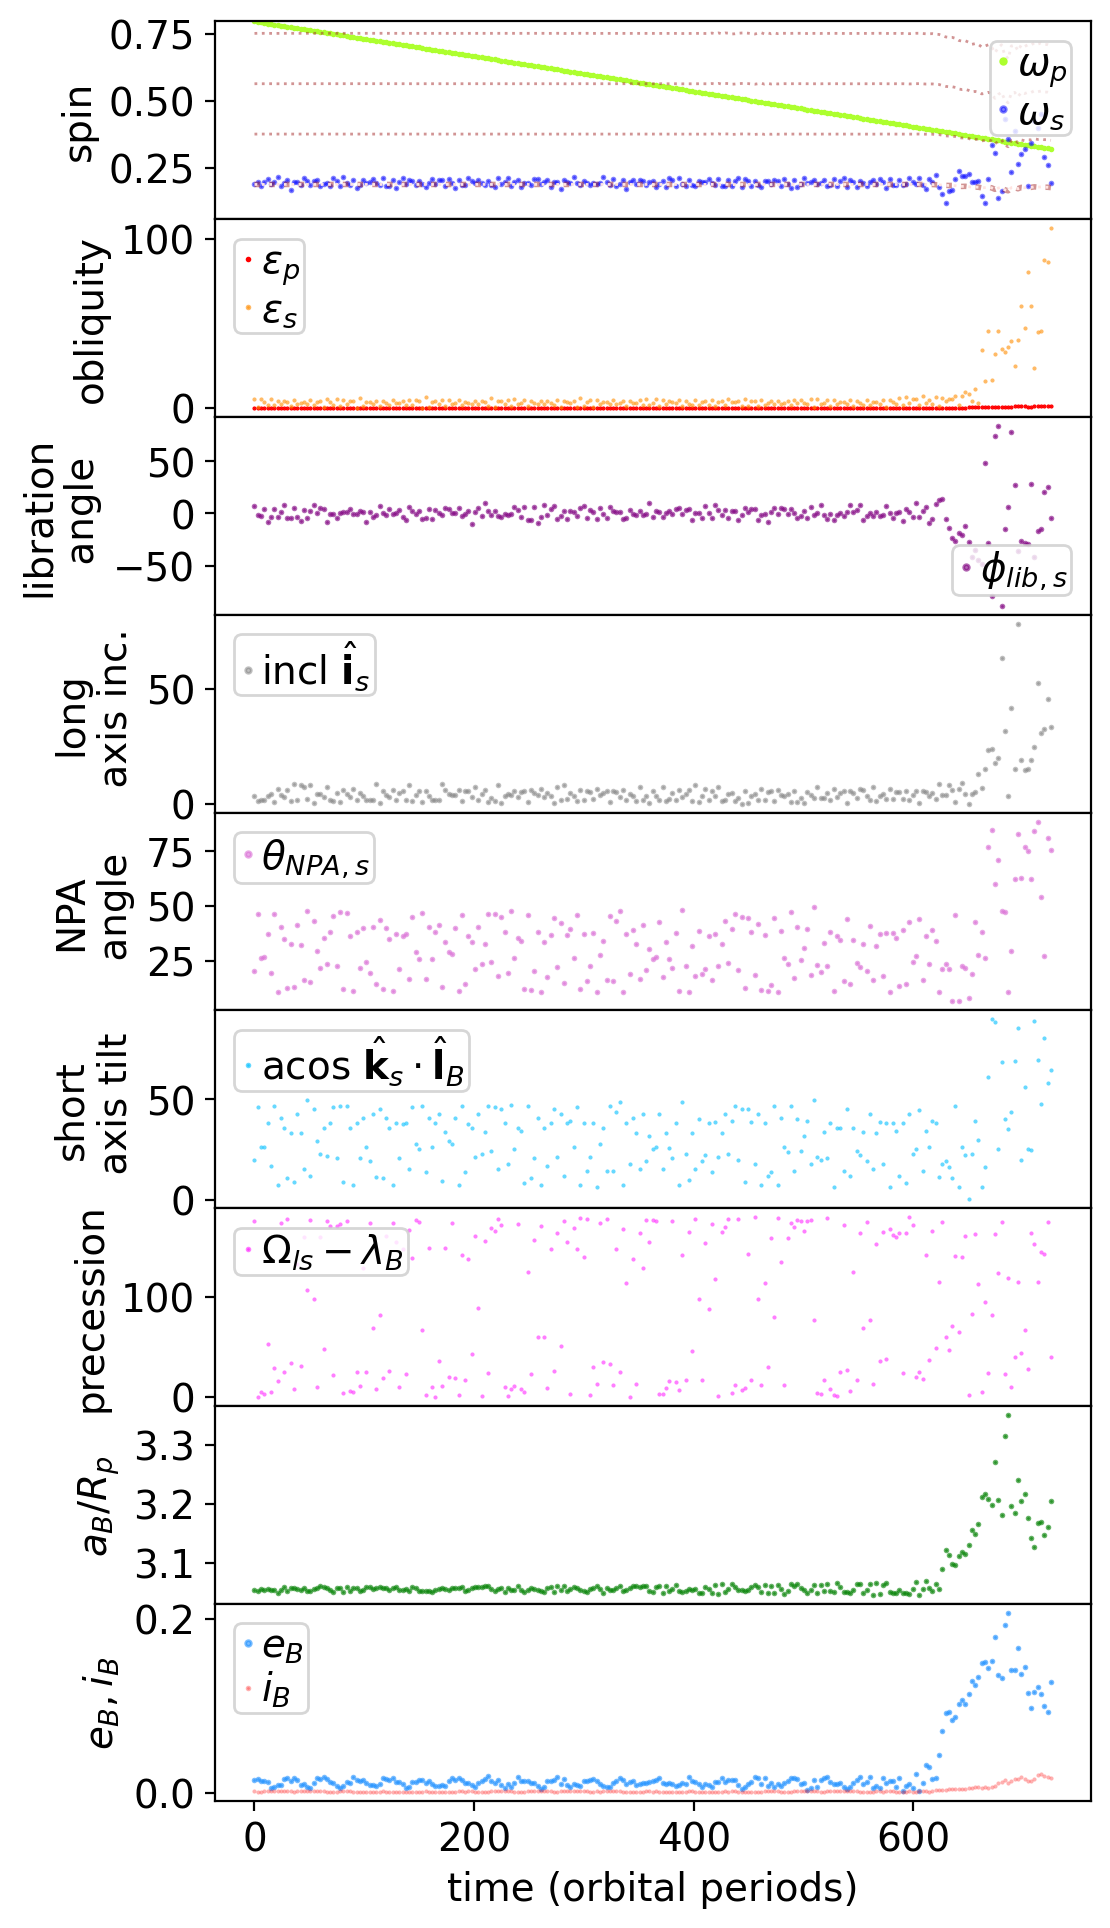

In [152]:
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
        lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,theta_k,theta2_NPA,ntilt2,longtilt2\
        = read_two_bodies(simdir,froot,GM)
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
       lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,\
       theta_k,theta2_NPA,ntilt2,longtilt2\
       ,froot,10,0,tmax,ofilename)

../bin3/b1c_ext_1.txt
../bin3/b1c_ext_2.txt


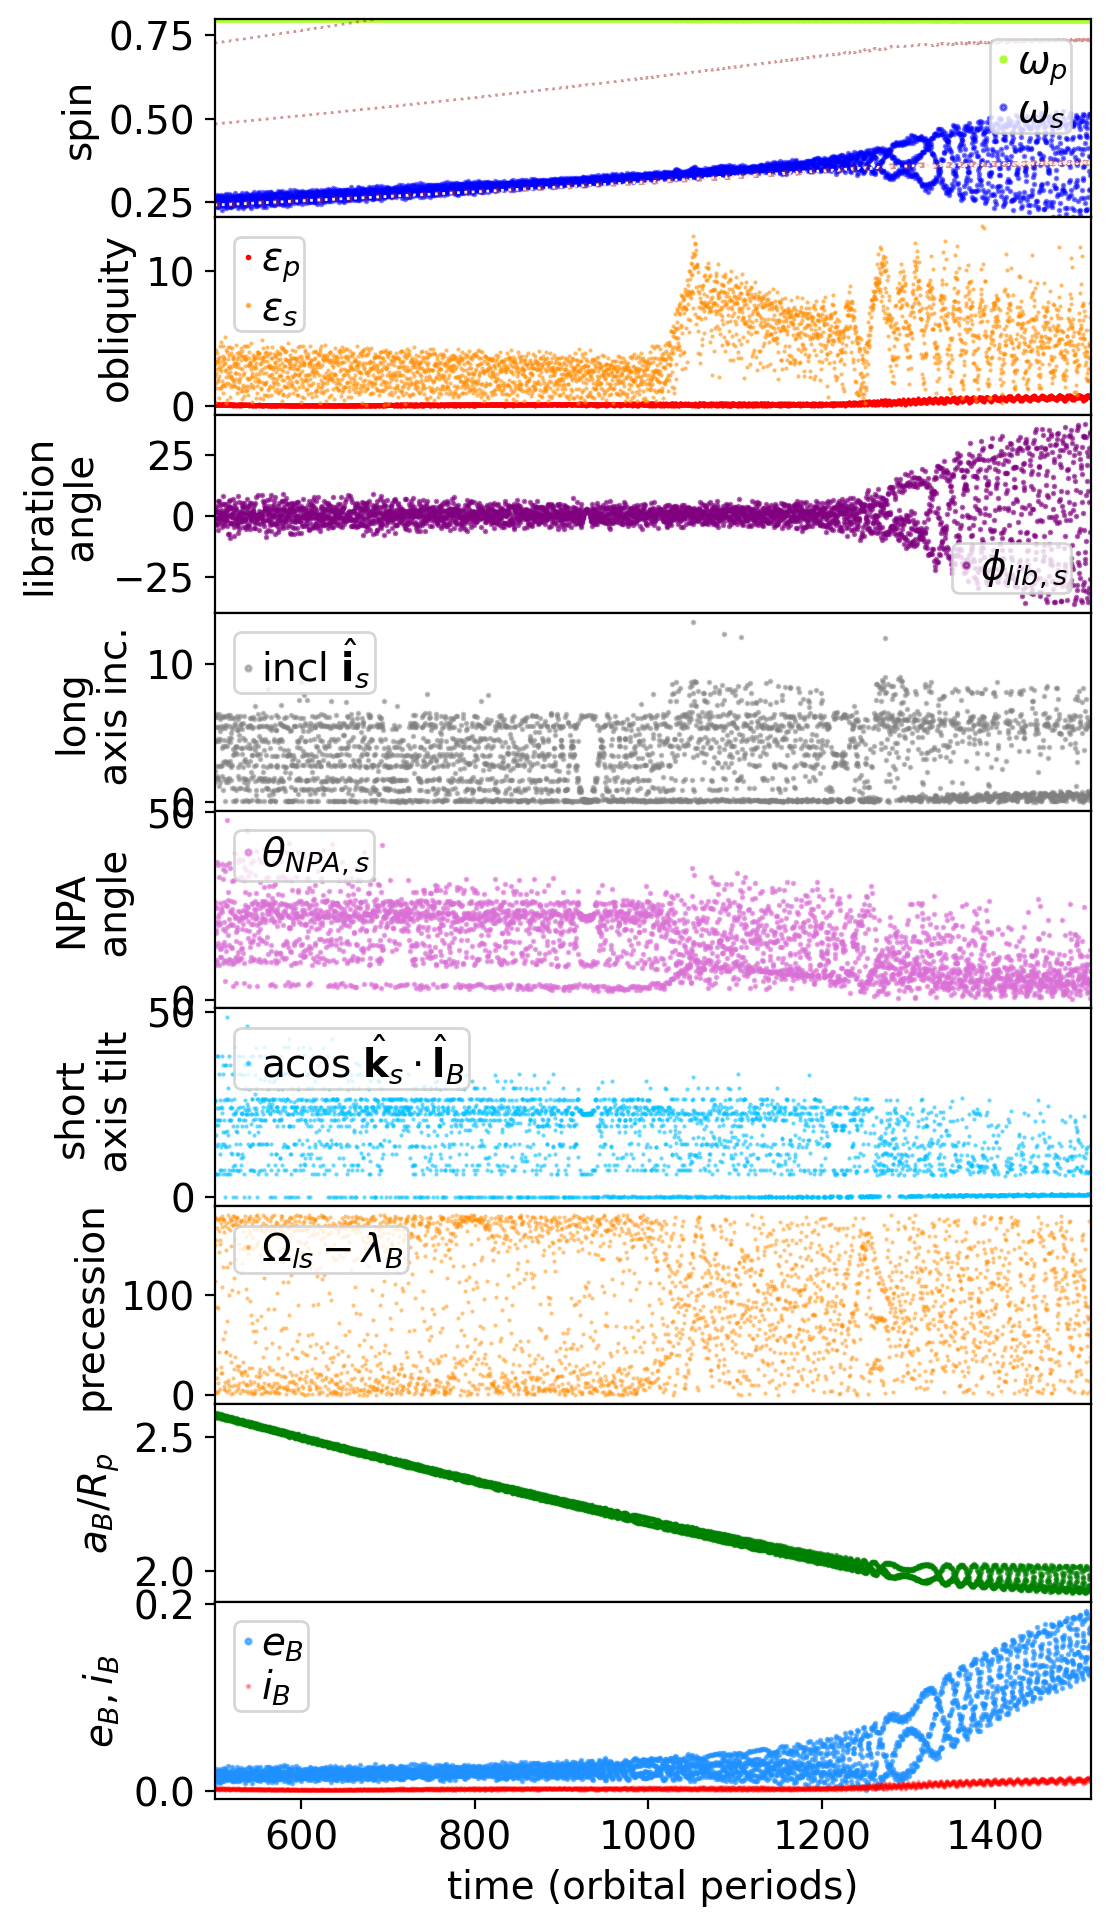

In [200]:
# old
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
        lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,theta_k,theta2_NPA,ntilt2,longtilt2\
        = read_two_bodies(simdir,froot,GM)
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        lobliquity_deg1,lobliquity_deg2,sobliquity_deg2,meanmotion,\
       lib_angle2,lprec_ang2,sprec_ang2,nprec_ang2,phi1,phi2,theta_B,\
       theta_k,theta2_NPA,ntilt2,longtilt2\
       ,froot,1,500,1510,ofilename)

In [428]:
# plot some stuff
def mkplot_b1c(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,\
               prec_ang1,prec_ang2,phi1,phi2,theta_B,theta_k,Jang2_deg,\
               froot,dn,als,oml,ofilename):
    # dn is to plot every other point
    nvpanels = 5
    f,axarr =  plt.subplots(nvpanels,1, dpi=150, figsize=(5,6), sharex=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.subplots_adjust(left=0.23, right=0.96, top=0.99, bottom=0.10, \
        wspace=0.22, hspace=0.0)
    
    Porb_init = 2*np.pi/meanmotion[0]
    tarr /= Porb_init 
    tarr -= 700
    axarr[0].set_xlim(left=0,right=max(tarr))
    varpi = lnarr+ararr
    
    ###########################
    il = 0;   # top
    #smax = np.amax([np.amax(om1),np.amax(om2)])
    #smin = np.amin([np.amin(om1),np.amin(om2)])
    #axarr[il].set_ylim(smin,smax)
    #axarr[il].plot(tarr[::dn],om1[::dn],'.',color='black',\
    #               ms=2,label=r'$\omega_p$')
    axarr[il].plot(tarr[::dn],om2[::dn],'.',color='blue',\
                   ms=2,label=r'$\omega_s$')
    mm_smo = meanmotion
    if (len(tarr)>100):
        mm_smo = savgol_filter(meanmotion, 21, 2, mode='nearest')
    #axarr[il].plot(tarr[::dn],mm_smo[::dn]*1,':',color='brown',lw=2,alpha=0.5)
    #for j in range(2,7):
    #    axarr[il].plot(tarr[::dn],mm_smo[::dn]*j,':',color='brown',lw=1,alpha=0.5)
    #for j in range(0,7):
    #    axarr[il].plot(tarr[::dn],mm_smo[::dn]*(j+0.5),':',color='purple',lw=1,alpha=0.5)
    
    #axarr[il].plot(tarr[::dn],mm_smo[::dn]*als, ':',color='green',lw=1,alpha=0.5)
        
    axarr[il].set_ylabel('spin, \n frequency')
 

    #axarr[il].plot(tarr[::dn],om1[::dn] - mm_smo[::dn]*(1 + als),':',color='green',\
    #               ms=2,label=r'$\omega_p - n_B - \alpha_s$',alpha=0.5,lw=4)
    
    
    axarr[il].plot(tarr[::dn],om1[::dn]/2 - mm_smo[::dn]*(1-oml),':',color='magenta',\
                   ms=2,label=r'$\omega_p/2 - n_B + \omega_l$',alpha=0.5,lw=4)
    
    
    axarr[il].plot(tarr[::dn],om1[::dn]/2 - mm_smo[::dn]*(als),'--',color='green',\
                   ms=2,label=r'$\omega_p/2 - \alpha_s$',alpha=0.5,lw=4)
    
    axarr[il].plot(tarr[::dn],om1[::dn]*2 - 2*mm_smo[::dn]*(1+oml/2),':',color='gold',\
                   ms=2,label=r'$\omega_p - n_B - \omega_l/2$',alpha=0.5,lw=3)
    
    
    axarr[il].set_ylim(bottom=0.2,top=0.48)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='lower right',ncol=1,columnspacing=0.5,\
                    borderaxespad=0.2)
    

    ##########################
    il = 1;
    axarr[il].plot(tarr[::dn],obliquity_deg1[::dn],'.',color='red',\
                   ms=2,label='prim')
    axarr[il].plot(tarr[::dn],obliquity_deg2[::dn],'.',color='darkorange',\
                   ms=2,label='sec')
    axarr[il].set_ylabel('obliquity \n (deg)')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    axarr[il].plot(tarr[::dn],Jang2_deg[::dn],'.',color='gold',ms=2)
    axarr[il].set_ylim(top=28)
    
    
    ##########################
    il = 2;
    lib_a = lib_angle%np.pi
    ii = (lib_a > np.pi/2)
    lib_a[ii] -= np.pi
    lib_a *= 180.0/np.pi
    axarr[il].plot(tarr[::dn],lib_a[::dn],'.',color='purple',ms=2)

    axarr[il].set_ylabel('libration \n angle (deg)')
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    
    ##########################
    il = 3;
    #ip1 = 1; ip2=0; iB=-2; ia2=-2 # nojoy
    #ip1 = 1; ip2=1; iB=-2; ia2=-2 #  nojoy
    #ip1 = 1; ip2=-1; iB=-2; ia2=-2 #  nojoy
    #ip1 = 1; ip2=0; iB=-2; ia2=-1 #  nojoy
    #ip1 = 1; ip2=-2; iB=-2; ia2=0 #  nojoy
    #ip1 = 1; ip2=-2; iB=0; ia2=1 #  nojoy
    #ip1 = 1; ip2=-2; iB=0; ia2=-1 #  nojoy
    #ip1 = 1; ip2=-0; iB=0; ia2=-2 #  nojoy
    #ip1 = 1; ip2=0; iB=1; ia2=-2 #  nojoy
    #ip1 = 1; ip2=0; iB=-1; ia2=-2 #  nojoy
    #ip1 = 1; ip2=0; iB=-1; ia2=2 #  nojoy
    #res_ang  = (ip1*phi1 +ip2*phi2 +iB*theta_B + ia1_prec_ang1 + ia2*prec_ang2)%np.pi 
    #res_ang = varpi%np.pi 
    
    #ip1 = 1; ip2=0; iB=-2; ia2=0 # nojoy
    #ip1 = 1; ip2=1; iB=-2; ia2=0 # nojoy
    #ip1 = 1; ip2=-1; iB=-2; ia2=0 # nojoy
    #ip1 = 1; ip2=0; iB=-2; ia2=1 # nojoy
    #ip1 = 1; ip2=-2; iB=-2; ia2=2 # nojoy
    #ip1 = 1; ip2=-2; iB=0; ia2=2 # nojoy
    #ip1 = 1; ip2=-2; iB=0; ia2=-2 # nojoy
    #ip1 = 1; ip2=0; iB=0; ia2=-4 # nojoy
    #ip1 = 1; ip2=0; iB=1; ia2=-4 # nojoy
    #ip1 = 1; ip2=0; iB=-1; ia2=-4 # nojoy
    #ip1 = 1; ip2=0; iB=-1; ia2=4 # nojoy
    #res_ang2 = (ip1*phi1+ip2*phi2 +iB*theta_B +ia1_prec_ang1+ ia2*prec_ang2)%np.pi 
   
    #res_ang2 = lnarr%np.pi 
    #res_ang2 = (prec_ang2-lnarr)%np.pi 
    
    res_ang  = (- prec_ang2 + theta_B)%np.pi
    #res_ang2 = (- prec_ang2 + theta_B - prec_ang1)%np.pi
    res_ang2 = (- prec_ang2+ theta_B - prec_ang1)%np.pi
    
    
    axarr[il].plot(tarr[::dn],res_ang [::dn],'.',color='green',ms=2,\
                   label = r'$\Omega_s - \lambda_B$')
    #axarr[il].plot(tarr[::dn],res_ang2[::dn],'.',color='orange',ms=2)
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2,loc='lower right')
    axarr[il].set_ylabel('res ang')
    
    ##########################
    il = 4;
    #ip1 = 1; ip2=-2; iB=2; ia2=0
    #res_ang = (ip1*phi1 +ip2*phi2 +iB*theta_B + ia2*prec_ang2)%np.pi 
    #ip1 = 1; ip2=-2; iB=-2; ia2=-2
    #res_ang2 = (ip1*phi1 +ip2*phi2 +iB*theta_B + ia2*prec_ang2)%np.pi 
    
    
    res_ang  = (theta_k - theta_B)%np.pi
    res_ang2  = (-theta_k + theta_B + phi2 )%np.pi
    #res_ang2  = (varpi -theta_B)%np.pi
    #res_ang  = (varpi)%np.pi
    axarr[il].plot(tarr[::dn],res_ang[::dn],'.',color='green',ms=2) #, label = r'$\phi_s - \varpi_B$')
    #axarr[il].plot(tarr[::dn],res_ang2[::dn],'.',color='orange',ms=2)
    axarr[il].set_ylabel('res ang')
    
    #axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
    #                markerscale=2,loc='lower right')
    
    
    il = nvpanels-1;
    axarr[il].set_xlabel('time (orbital periods)')
    if (len(ofilename)>3):
        plt.savefig(ofilename)

../bin3/b1c_ext_1.txt
../bin3/b1c_ext_2.txt


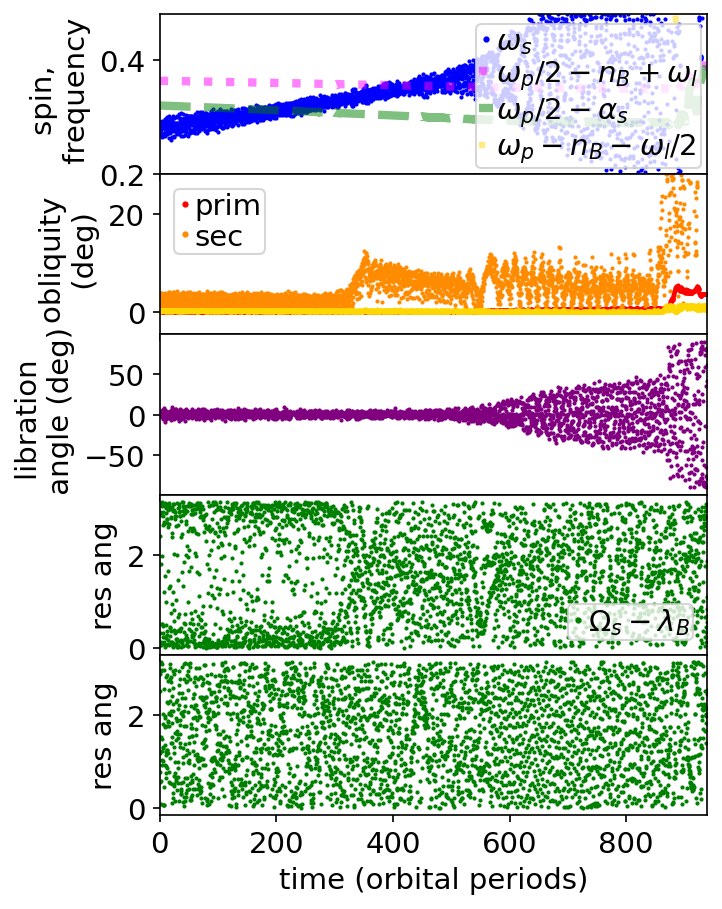

In [448]:
### read in orbital elements, spins for both resolved bodies
froot = 'b1c'  # no tides, drift inward semi-major axis
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,\
        prec_ang1,prec_ang2,phi1,phi2,theta_B,theta_k,Jang2_deg\
        = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename='b1c.png'
mkplot_b1c(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,prec_ang1,\
           prec_ang2,phi1,phi2,theta_B,theta_k,Jang2_deg,\
           froot,1,als,oml,ofilename)

../bin3/b1d_ext_1.txt
../bin3/b1d_ext_2.txt


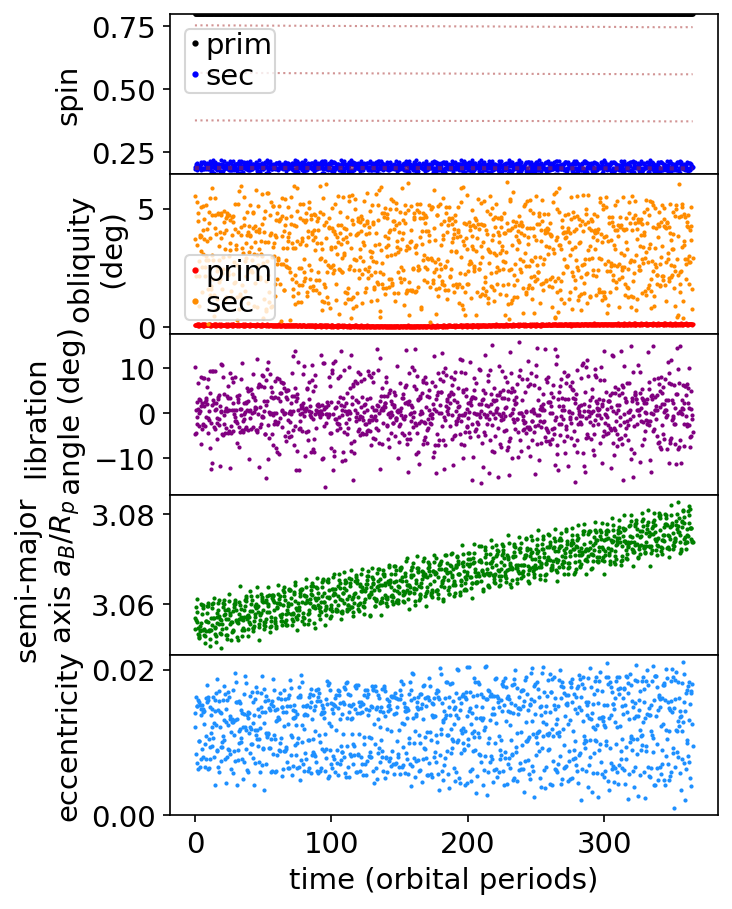

In [54]:
# read in orbital elements, spins for both resolved bodies
froot = 'b1d'  # no tides, eccentricity increase
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename=''
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,1,ofilename)

../bin3/c1_ext_1.txt
../bin3/c1_ext_2.txt


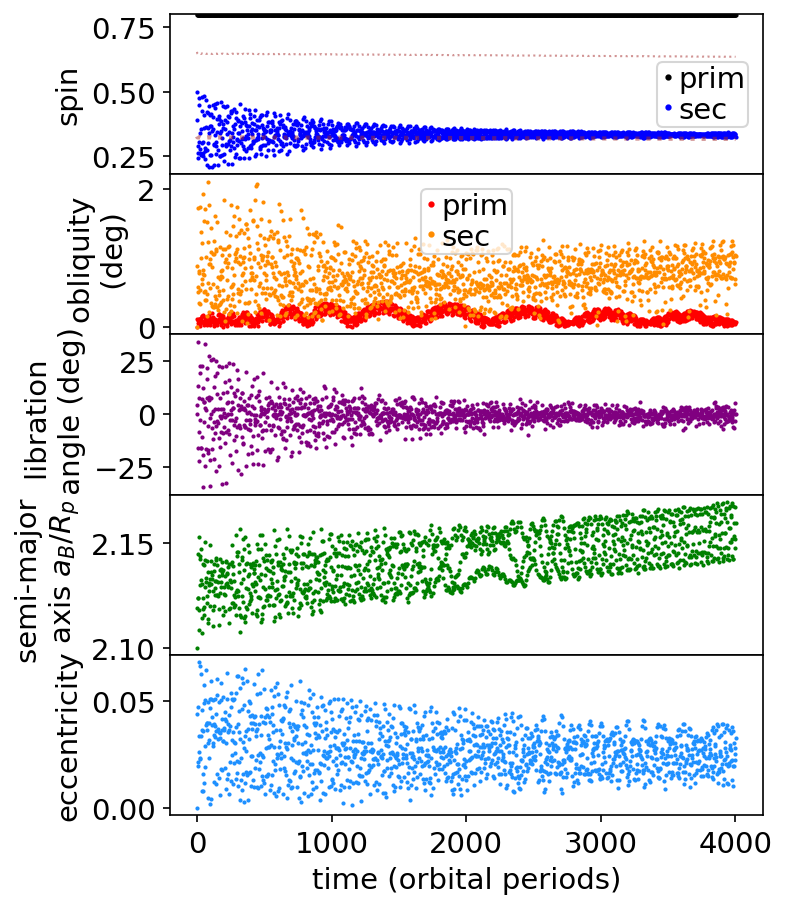

In [197]:
# read in orbital elements, spins for both resolved bodies
froot = 'c1'  # tides alone
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename=''
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,5,ofilename)

../bin3/c1a_ext_1.txt
../bin3/c1a_ext_2.txt


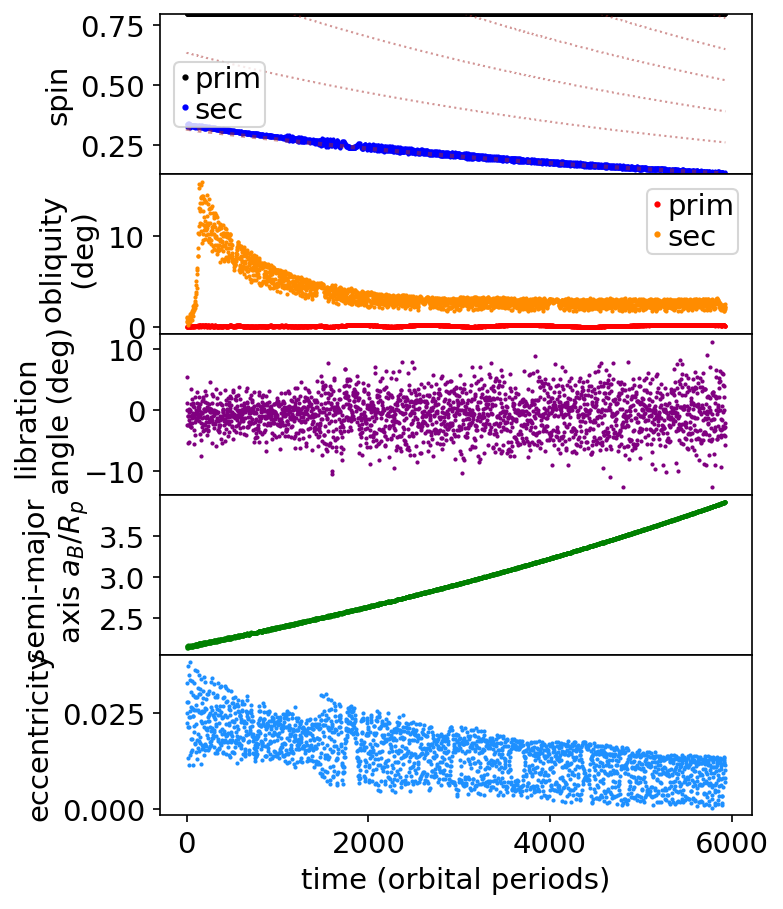

In [203]:
# read in orbital elements, spins for both resolved bodies
froot = 'c1a'  # drift outward semi-major axis
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename=''
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,5,ofilename)

$A = \frac{M}{5} (b^2 + c^2) $

$B = \frac{M}{5} (a^2 + c^2) $

$C = \frac{M}{5} (a^2 + b^2) = \frac{M}{5} a^2(1 + \frac{b}{a} )^2)) $

$A<B<C$

$A+B+C = \frac{2M}{5}(a^2 + b^2 + c^2) $ 

$V = \frac{4}{3} \pi abc = \frac{4}{3} \pi a^3 \frac{b}{a} \frac{c}{a}  = \frac{4}{3} \pi R^3$ 

If $R=1$ then 
$a = \left[ \frac{b}{a} \frac{c}{a} \right]^{-\frac{1}{3}} $

$ A + B - C = \frac{2}{5} Mc^2$

$ A + C - B = \frac{2}{5} Mb^2$

$ -A + B+ C = \frac{2}{5} Ma^2$


In [39]:
# from a1_run.txt
I1_p,I2_p,I3_p = 0.480784, 0.449625, 0.440806
I1_s,I2_s,I3_s = 0.000316, 0.000276, 0.000208
print('primary:')
print_axis_ratios(I1_p,I2_p,I3_p)
print('secondary:')
print_axis_ratios(I1_s,I2_s,I3_s)
alpha_s(I1_s,I2_s,I3_s)
omega_lib(I1_s,I2_s,I3_s)

primary:
a,b,c= 1.106 1.086 1.012
b/a = 0.982, c/a = 0.915
secondary:
a,b,c= 0.031 0.025 0.020
b/a = 0.804, c/a = 0.661
alpha_s/n_B =  0.351
omega_lib/n_B = 0.803


In [7]:
# b1 simulation
I1_p, I2_p, I3_p =   0.485491, 0.449510, 0.428806
I1_s, I2_s, I3_s =  0.000290, 0.000270, 0.000197
print('primary:')
print_axis_ratios(I1_p,I2_p,I3_p)
print('secondary:')
print_axis_ratios(I1_s,I2_s,I3_s)
alpha_s(I1_s,I2_s,I3_s)
omega_lib(I1_s,I2_s,I3_s)

primary:
a,b,c= 1.125 1.078 0.991
b/a = 0.958, c/a = 0.881
secondary:
a,b,c= 0.030 0.023 0.021
b/a = 0.773, c/a = 0.698
alpha_s/n_B =  0.292
omega_lib/n_B = 0.869


In [8]:
# c1 simulation, same as b
I1_p, I2_p, I3_p = 0.485491, 0.449510, 0.428806
I1_s, I2_s, I3_s = 0.000290, 0.000270, 0.000197
print('primary:')
print_axis_ratios(I1_p,I2_p,I3_p)
print('secondary:')
print_axis_ratios(I1_s,I2_s,I3_s)
alpha_s(I1_s,I2_s,I3_s)
omega_lib(I1_s,I2_s,I3_s)

primary:
a,b,c= 1.125 1.078 0.991
b/a = 0.958, c/a = 0.881
secondary:
a,b,c= 0.030 0.023 0.021
b/a = 0.773, c/a = 0.698
alpha_s/n_B =  0.292
omega_lib/n_B = 0.869
